Importar bibliotecas

In [1]:
import cv2
from PIL import Image

Ler imagem original

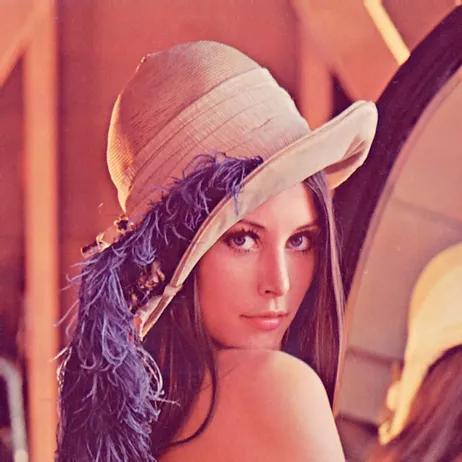

In [2]:
caminho_imagem = "/content/drive/MyDrive/DIO/Projetos/02-Reducao dimensionalidade/lena.jpeg"
caminho_local = 'dataset/lena.jpeg'
imagem_pil = Image.open(caminho_local)
imagem_pil

Função para converter para níveis de cinza (0 a 255)

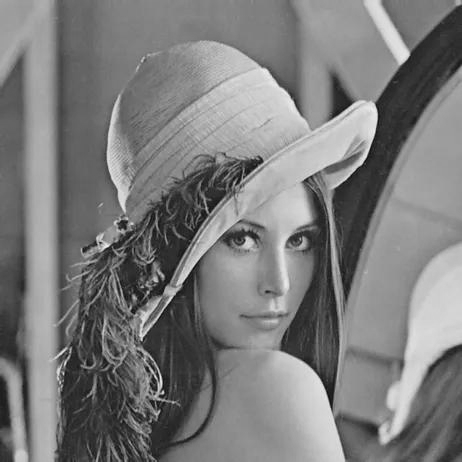

In [3]:
def to_grayscale(image_path):
  try:
    # Open the image using PIL
    img = Image.open(image_path)
    # Get image dimensions
    width, height = img.size

    # Create a new image with the same dimensions but in grayscale mode
    grayscale_img = Image.new("L", (width, height))

    # Iterate through each pixel
    for x in range(width):
      for y in range(height):
        # Get the RGB values of the current pixel
        r, g, b = img.getpixel((x, y))

        # Calculate the grayscale value using the luminosity method
        grayscale_value = int(0.299 * r + 0.587 * g + 0.114 * b)

        # Set the grayscale value for the corresponding pixel in the new image
        grayscale_img.putpixel((x, y), grayscale_value)

    return grayscale_img

  except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
    return None
  except Exception as e:
    print(f"An error occurred: {e}")
    return None


grayscale_image = to_grayscale(caminho_local)
# grayscale_image.save("/content/drive/MyDrive/DIO/Projetos/02-Reducao dimensionalidade/grayscale_lena.jpg")
grayscale_image.save("dataset/grayscale_lena.jpg")
grayscale_image

Função para criar imagem binarizada (0 e 255), preto e branco

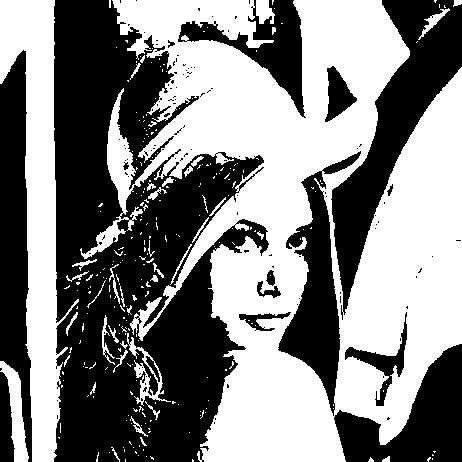

In [4]:
def binarize_image(image_path, threshold=128):
    try:
        img = Image.open(image_path).convert("L")
        width, height = img.size
        binarized_img = Image.new("L", (width, height))

        for x in range(width):
            for y in range(height):
                pixel_value = img.getpixel((x, y))
                if pixel_value >= threshold:
                    binarized_img.putpixel((x, y), 255)
                else:
                    binarized_img.putpixel((x, y), 0)
        return binarized_img

    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


binarized_image = binarize_image(caminho_local)
# binarized_image.save("/content/drive/MyDrive/DIO/Projetos/02-Reducao dimensionalidade/binarized_lena.jpg")
binarized_image.save("dataset/binarized_lena.jpg")
binarized_image